**STOCK MARKET PREDICTION AND ANALYSIS** 

1. Stocks from Apple, Amazon, Google, and Microsoft are explored (closing prices, daily return, moving average). 
2. Correlation between stocks is observed. 
3. Risk of investing in a particular stock is measured.  
4. Time Series forecasting is done using ARIMA for Google Stocks.
5. Future stock prices are predicted through Long Short Term Memory (LSTM) method. 

In [1]:
!pip install yfinance pandas_datareader


In [2]:
!pip install --upgrade yfinance


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Reading stock data from Yahoo Finance
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime

stock_data = {}

# Stocks used for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']


end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


for stock in tech_list:
    stock_data[stock] = yf.download(stock, start=start, end=end)


AAPL = stock_data['AAPL']
GOOG = stock_data['GOOG']
MSFT = stock_data['MSFT']
AMZN = stock_data['AMZN']


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]


for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)

print(df.tail(10))


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Price      Adj Close Close High  Low Open Volume company_name Adj Close Close  \
Ticker          AAPL  AAPL AAPL AAPL AAPL   AAPL                   GOOG  GOOG   
Date                                                                            
2024-12-02       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-03       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-04       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-05       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-06       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-09       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-10       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-11       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-12       NaN   NaN  NaN  NaN  NaN    NaN       AMAZON       NaN   NaN   
2024-12-13       NaN   NaN  

In [4]:
df.head(10)

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-12-14  197.144196  198.110001  199.619995  196.160004  198.020004   
2023-12-15  196.606827  197.570007  198.399994  197.000000  197.529999   
2023-12-18  194.934998  195.889999  196.630005  194.389999  196.089996   
2023-12-19  195.979889  196.940002  196.949997  195.889999  196.160004   
2023-12-20  193.880188  194.830002  197.679993  194.830002  196.899994   
2023-12-21  193.730881  194.679993  197.080002  193.500000  196.100006   
2023-12-22  192.656174  193.600006  195.410004  192.970001  195.179993   
2023-12-26  192.108871  193.050003  193.889999  192.830002  193.610001   
2023-12-27  192.208359  193.149994  193.500000  191.089996  192.490005   
2023-12-28  192.636292  193.580002  194.660004  193.169998  194.139999   

Price            Volume company_name Adj Close Close High  ...       Low Open  \
Ticker             AAPL                   GOOG  GOOG GOOG  ... MSFT MSFT MSFT   
Date                                                       ...                  
2023-12-14   66831600.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-15  128256700.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-18   55751900.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-19   40714100.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-20   52242800.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-21   46482500.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-22   37122800.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-26   28919300.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-27   48087700.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   
2023-12-28   34049900.0        APPLE       NaN   NaN  NaN  ...  NaN  NaN  NaN   

Price      Volume Adj Close Close High  Low Open Volume  
Ticker       MSFT      AMZN  AMZN AMZN AMZN AMZN   AMZN  
Date                                                     
2023-12-14    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-15    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-18    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-19    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-20    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-21    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-22    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-26    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-27    NaN       NaN   NaN  NaN  NaN  NaN    NaN  
2023-12-28    NaN       NaN   NaN  NaN  NaN  NaN    NaN  

[10 rows x 25 columns]

In [5]:
# checking if data is downloaded correctly
for ticker in tech_list:
    print(f"{ticker} data:\n", stock_data[ticker].head(), "\n")

AAPL data:
 Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-12-14  197.144196  198.110001  199.619995  196.160004  198.020004   
2023-12-15  196.606827  197.570007  198.399994  197.000000  197.529999   
2023-12-18  194.934998  195.889999  196.630005  194.389999  196.089996   
2023-12-19  195.979889  196.940002  196.949997  195.889999  196.160004   
2023-12-20  193.880188  194.830002  197.679993  194.830002  196.899994   

Price          Volume company_name  
Ticker           AAPL               
Date                                
2023-12-14   66831600        APPLE  
2023-12-15  128256700        APPLE  
2023-12-18   55751900        APPLE  
2023-12-19   40714100        APPLE  
2023-12-20   52242800        APPLE   

GOOG data:
 Price        Adj Close       Close        High         Low        Open  \
Ticker     

In [6]:
# Checking if 'Adj Close' exists
for ticker in tech_list:
    print(f"{ticker} columns:\n", stock_data[ticker].columns, "\n")

AAPL columns:
 MultiIndex([(   'Adj Close', 'AAPL'),
            (       'Close', 'AAPL'),
            (        'High', 'AAPL'),
            (         'Low', 'AAPL'),
            (        'Open', 'AAPL'),
            (      'Volume', 'AAPL'),
            ('company_name',     '')],
           names=['Price', 'Ticker']) 

GOOG columns:
 MultiIndex([(   'Adj Close', 'GOOG'),
            (       'Close', 'GOOG'),
            (        'High', 'GOOG'),
            (         'Low', 'GOOG'),
            (        'Open', 'GOOG'),
            (      'Volume', 'GOOG'),
            ('company_name',     '')],
           names=['Price', 'Ticker']) 

MSFT columns:
 MultiIndex([(   'Adj Close', 'MSFT'),
            (       'Close', 'MSFT'),
            (        'High', 'MSFT'),
            (         'Low', 'MSFT'),
            (        'Open', 'MSFT'),
            (      'Volume', 'MSFT'),
            ('company_name',     '')],
           names=['Price', 'Ticker']) 

AMZN columns:
 MultiIndex([(   'Ad

**Closing Price :**  
The closing price is also referred to as “close”. Essentially it is the final traded price of a financial asset at the end of a trading day or a trading session. 

<Figure size 1000x1000 with 0 Axes>

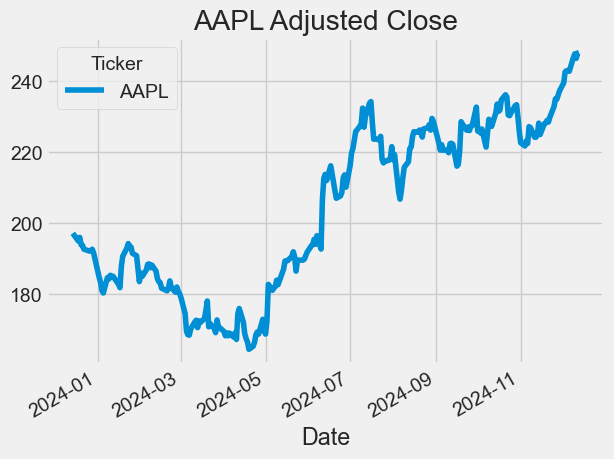

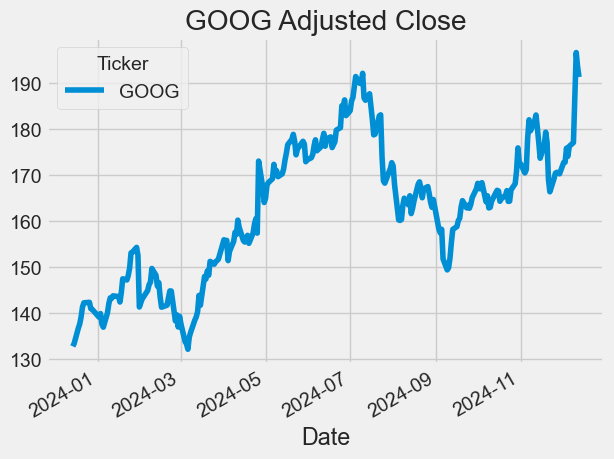

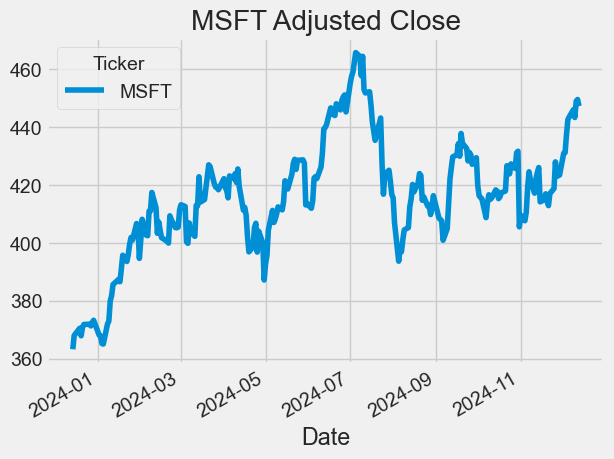

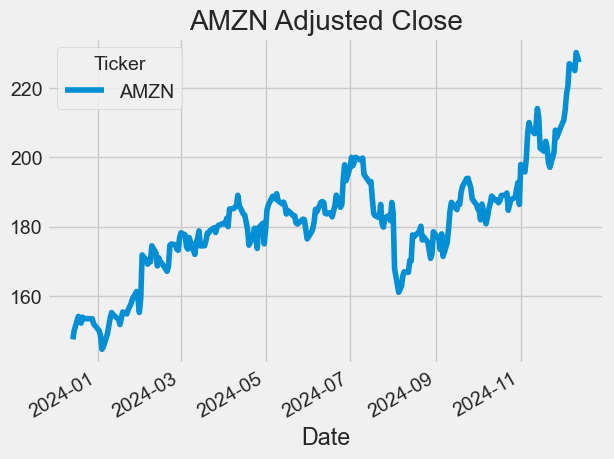

In [7]:
#Closing Price
plt.figure(figsize=(10, 10))

stock_data['AAPL']['Adj Close'].plot()
plt.title("AAPL Adjusted Close")
plt.show()

stock_data['GOOG']['Adj Close'].plot()
plt.title("GOOG Adjusted Close")
plt.show()

stock_data['MSFT']['Adj Close'].plot()
plt.title("MSFT Adjusted Close")
plt.show()

stock_data['AMZN']['Adj Close'].plot()
plt.title("AMZN Adjusted Close")
plt.show()



In [8]:
closing_df = pd.DataFrame()

for stock in tech_list:
    closing_df[stock] = stock_data[stock]['Adj Close']

tech_rets = closing_df.pct_change()

tech_rets.head()


,AAPL,GOOG,MSFT,AMZN
Date,,,,
2023-12-14,NaN,NaN,NaN,NaN
2023-12-15,-0.002726,0.004805,0.013117,0.017298
2023-12-18,-0.008503,0.025030,0.005179,0.027339
2023-12-19,0.005360,0.006633,0.001637,-0.001817
2023-12-20,-0.010714,0.011296,-0.007073,-0.010859


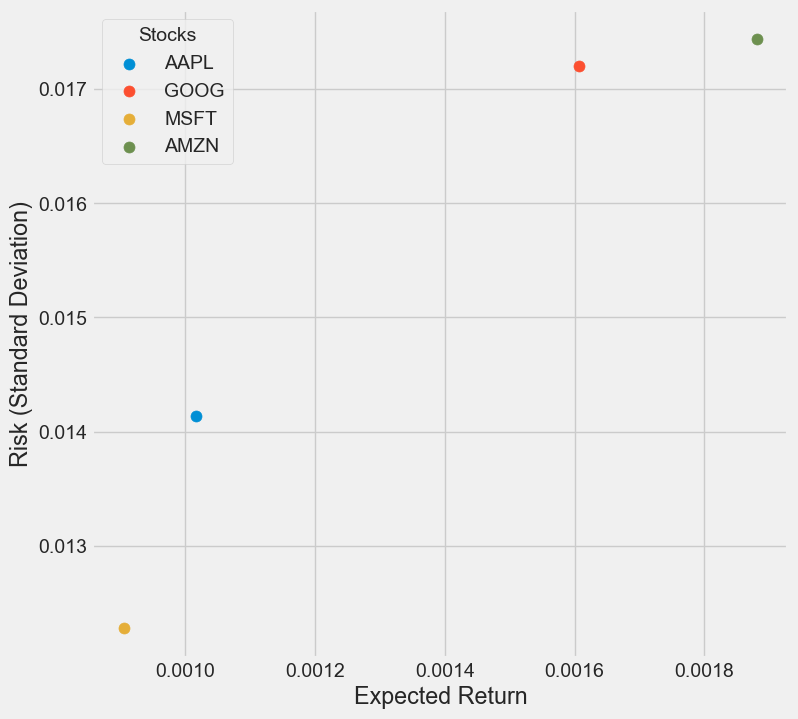

In [9]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(8, 8))

for label in rets.columns:
    plt.scatter(rets[label].mean(), rets[label].std(), s=area, label=label)

plt.xlabel('Expected Return')
plt.ylabel('Risk (Standard Deviation)')

plt.legend(title='Stocks')

plt.show()

Risk-Return Tradeoff : Higher is expected return, more is the risk for the stocks.
MSFT shows low risks and potentially low returns ideal for risk averse investors. 

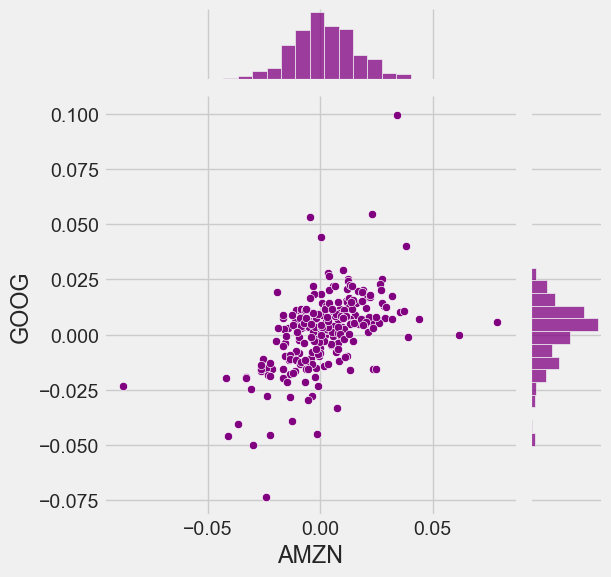

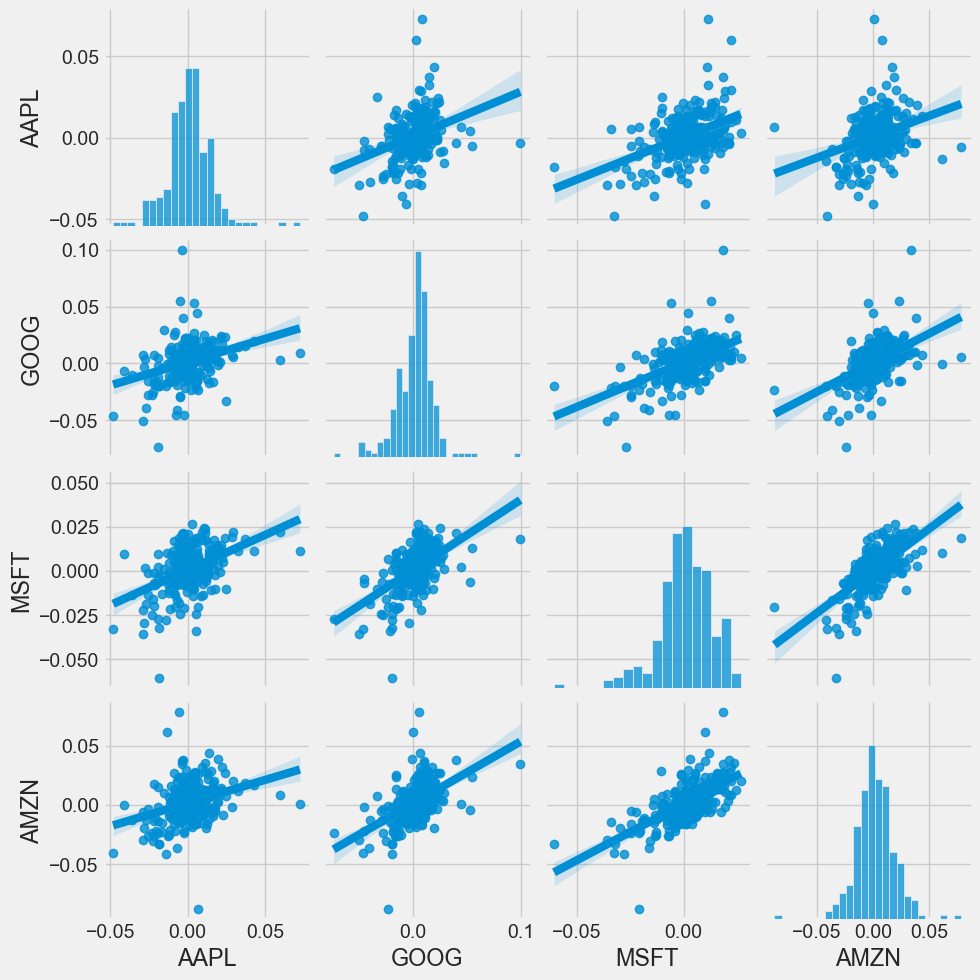

In [10]:
# compare the daily percentage return of two stocks to check correlation
sns.jointplot(x='AMZN', y='GOOG', data=tech_rets, kind='scatter', color='purple')

# Comparison Analysis for all combinations
sns.pairplot(tech_rets, kind='reg')

1. Each histogram shows rougly a bell curved shape, while AMZN stocks are normally distributed. 
2. A positive correlation is observed amongst most pairs. Slightly weaker correlations may exist for certain pairs, but none show negative or no correlation.
3. The regression lines in the scatter plots indicate linear relationships between the pairs of stocks. This suggests that when one stock’s return increases, the others tend to increase as well.
4. Stocks like GOOG and AMZN may exhibit higher dispersion (greater volatility) compared to AAPL and MSFT.

C:\Users\shubh\AppData\Local\Temp\ipykernel_42160\3274364906.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x1000 with 0 Axes>

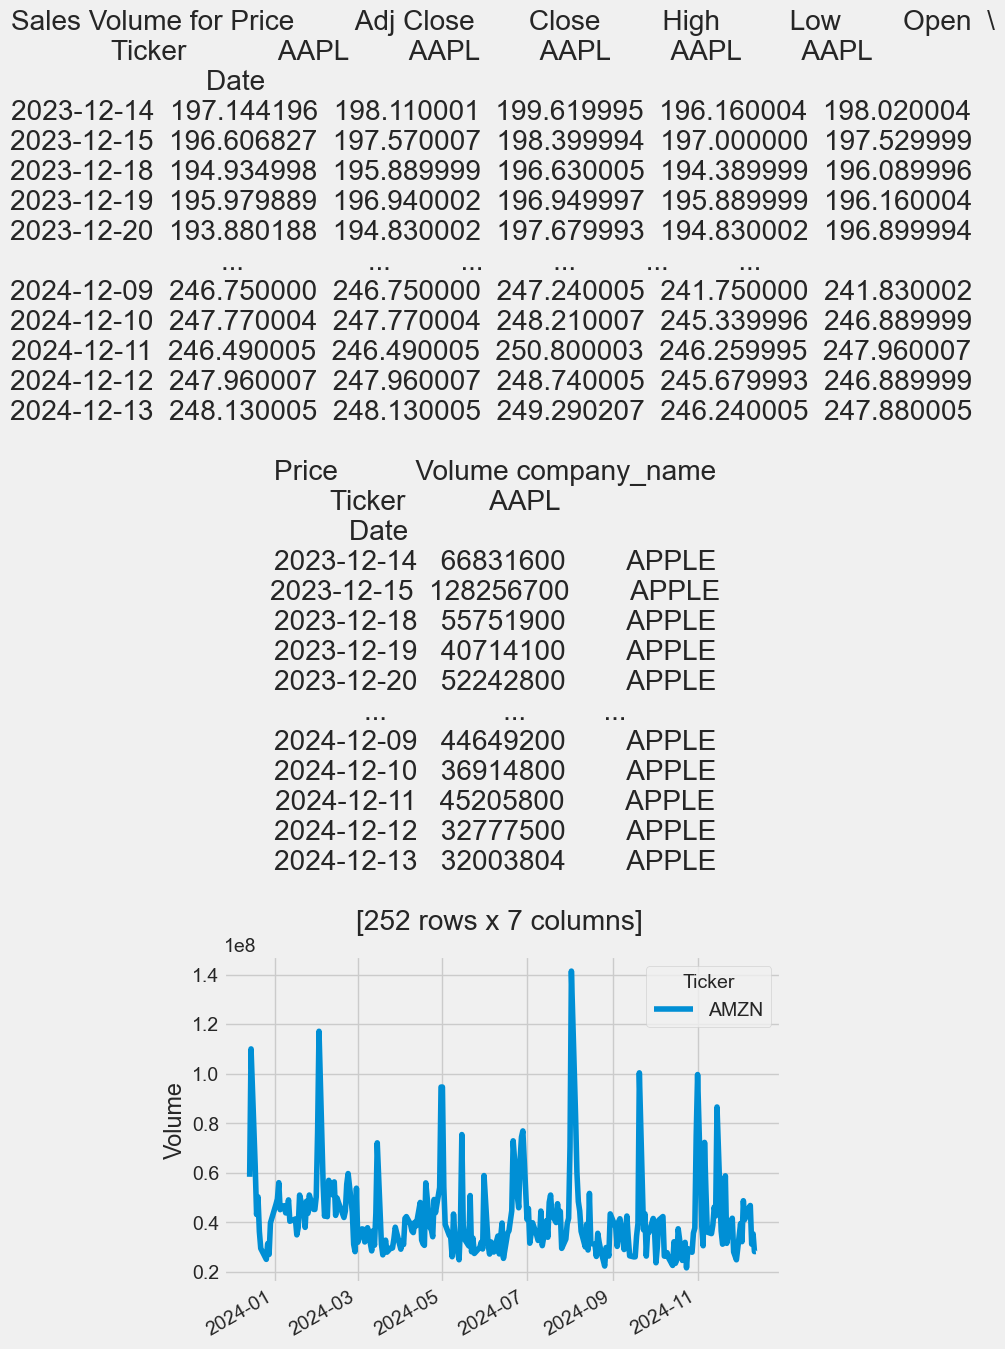

In [11]:
#Volume of Sales
plt.figure(figsize=(10, 10))

company['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume for {AAPL} ")
    
plt.tight_layout()

**Moving average** is calculated to analyze data points by creating a series of averages from different subsets of the full data set. In finance, it is commonly used to smooth out short-term fluctuations in stock prices or other data to reveal long-term trends. 

Simple moving averages (SMAs) use a simple arithmetic average of prices over some timespan, while exponential moving averages (EMAs) place greater weight on more recent prices than older ones over the time period.

Text(0.5, 1.0, 'AMAZON')

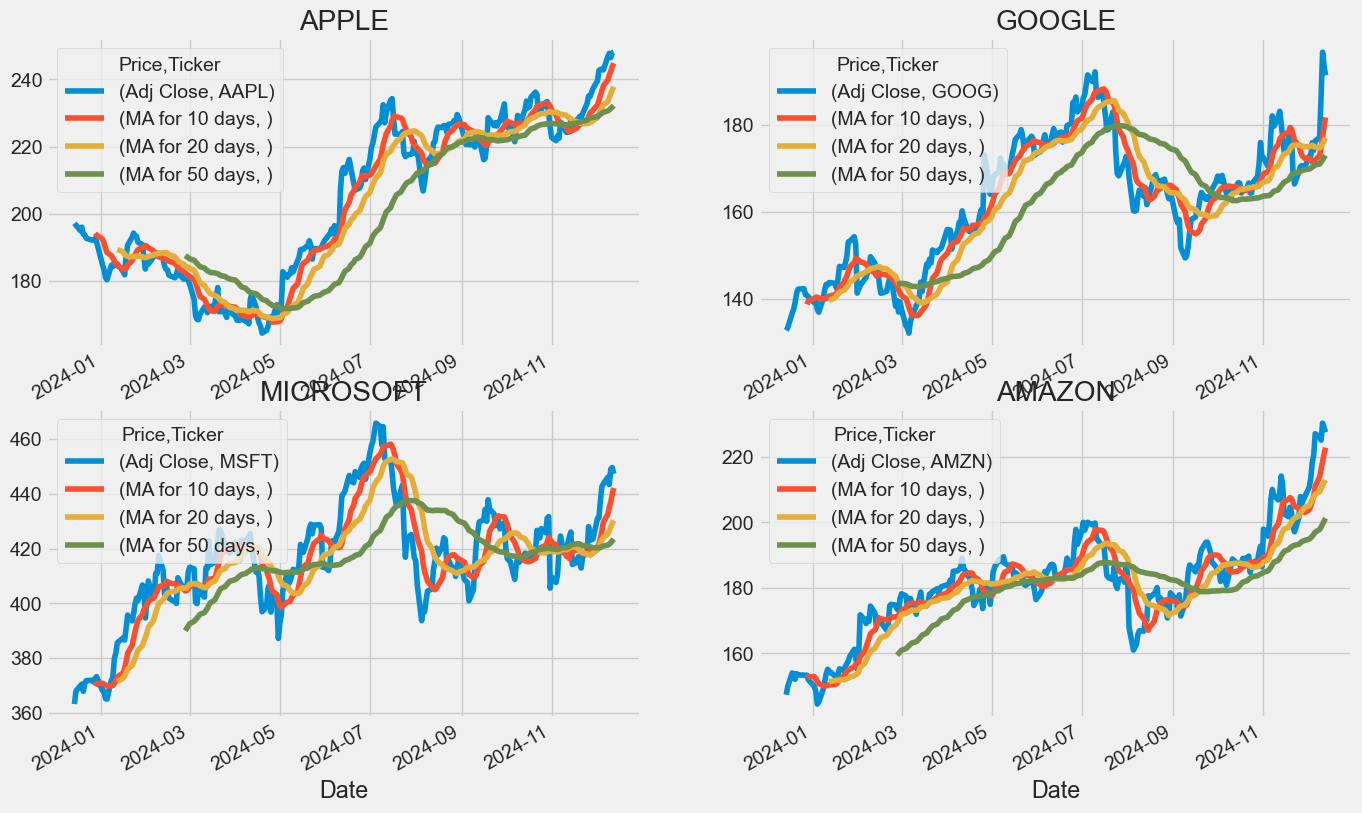

In [12]:
#Moving Average
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

Text(0.5, 1.0, 'AMAZON')

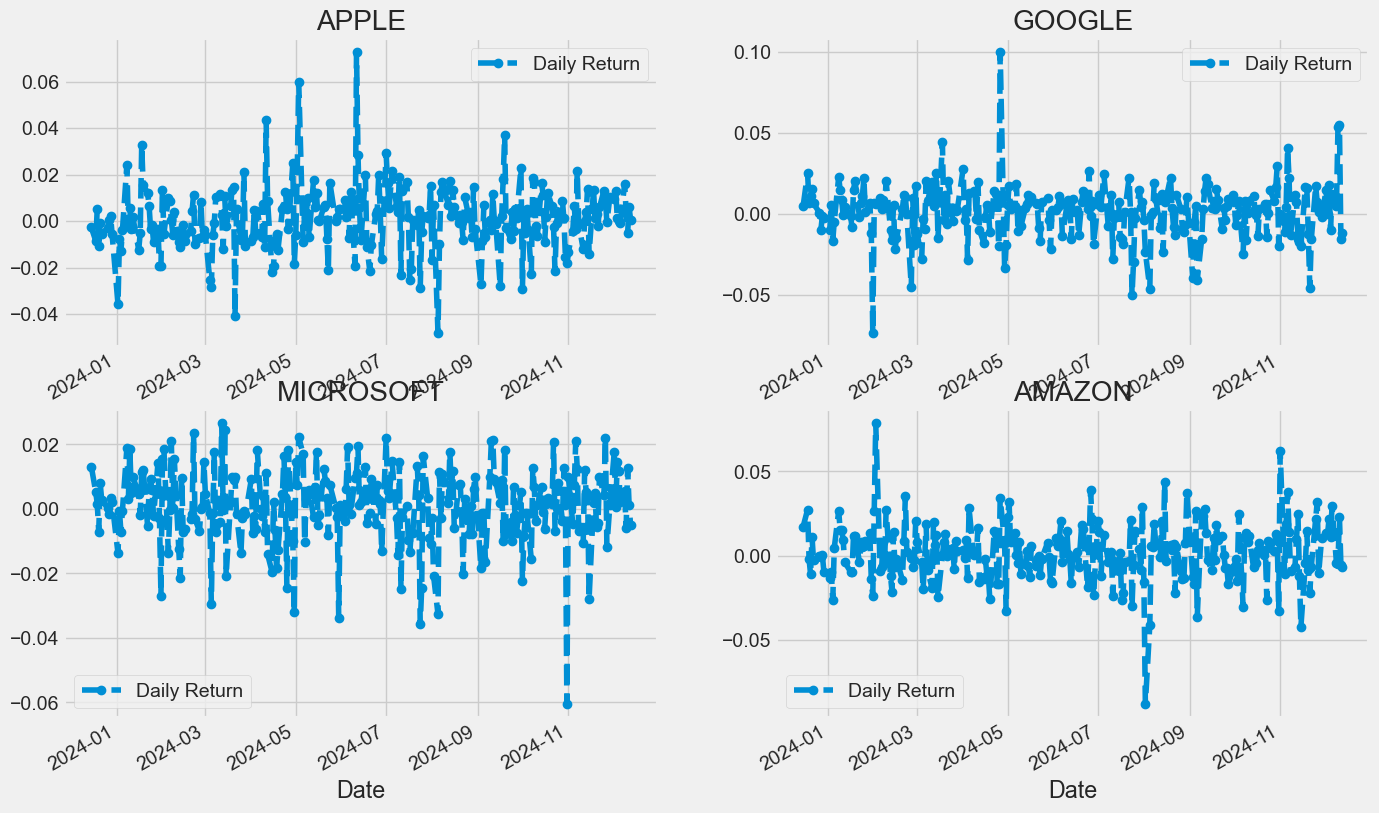

In [13]:
#daily return for stocks
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

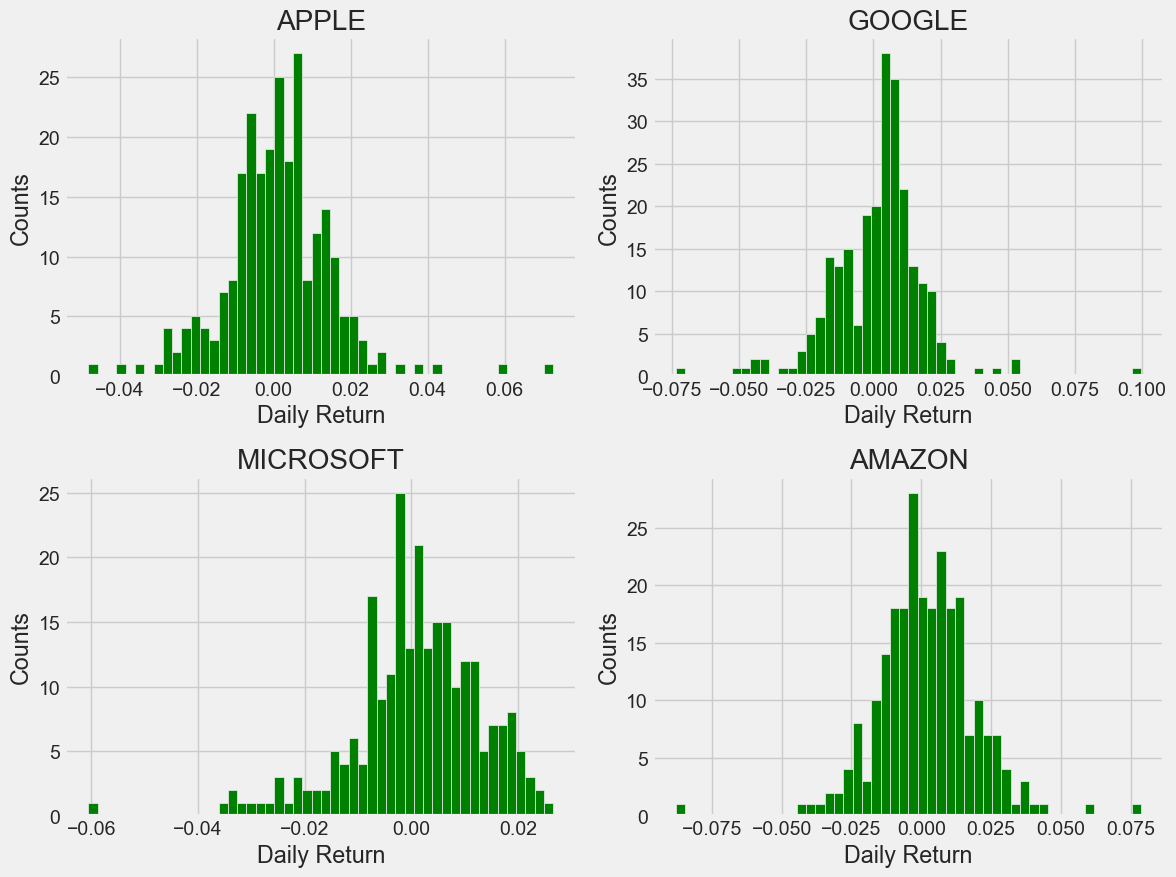

In [14]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50, color='green')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

Text(0.5, 1.0, 'Correlation of stock closing price')

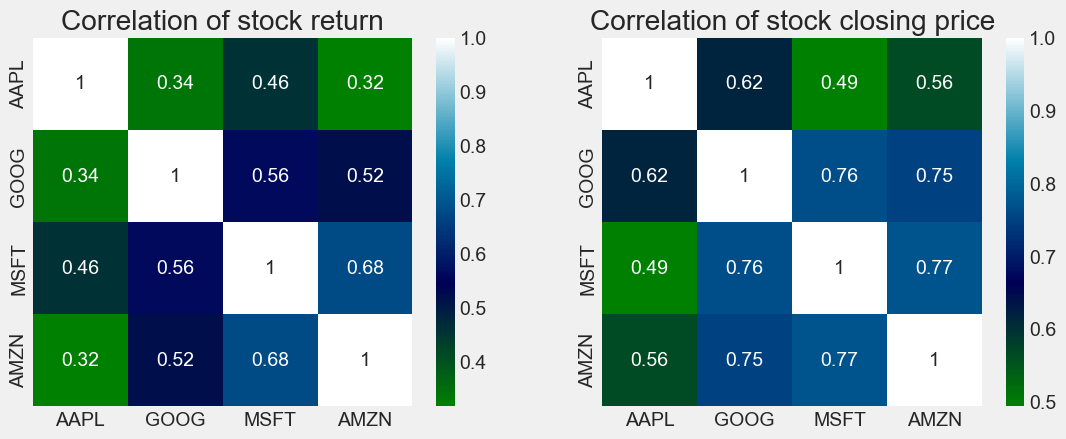

In [15]:
plt.figure(figsize=(12, 10))

#correlation of stock return
plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='ocean')
plt.title('Correlation of stock return')

#correlation of stock closing price
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='ocean')
plt.title('Correlation of stock closing price')

**TIME SERIES FORECASTING USING ARIMA FOR GOOGLE STOCK PRICES**

In [16]:
import datetime
from datetime import date, timedelta
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

Price        Date        Open        High         Low       Close   Adj Close  \
Ticker                   GOOG        GOOG        GOOG        GOOG        GOOG   
246    2024-12-09  175.714996  178.039993  175.399994  177.100006  177.100006   
247    2024-12-10  184.535004  188.029999  182.669998  186.529999  186.529999   
248    2024-12-11  186.699997  196.889999  186.259995  196.710007  196.710007   
249    2024-12-12  196.300003  196.705002  193.279999  193.630005  193.630005   
250    2024-12-13  192.750000  194.339996  191.259995  191.380005  191.380005   

Price     Volume  
Ticker      GOOG  
246     19887800  
247     34317400  
248     41664500  
249     25197800  
250     18360673  


In [17]:
data = data[["Date", "Close"]]
print(data.head())

Price        Date       Close
Ticker                   GOOG
0      2023-12-15  133.839996
1      2023-12-18  137.190002
2      2023-12-19  138.100006
3      2023-12-20  139.660004
4      2023-12-21  141.800003


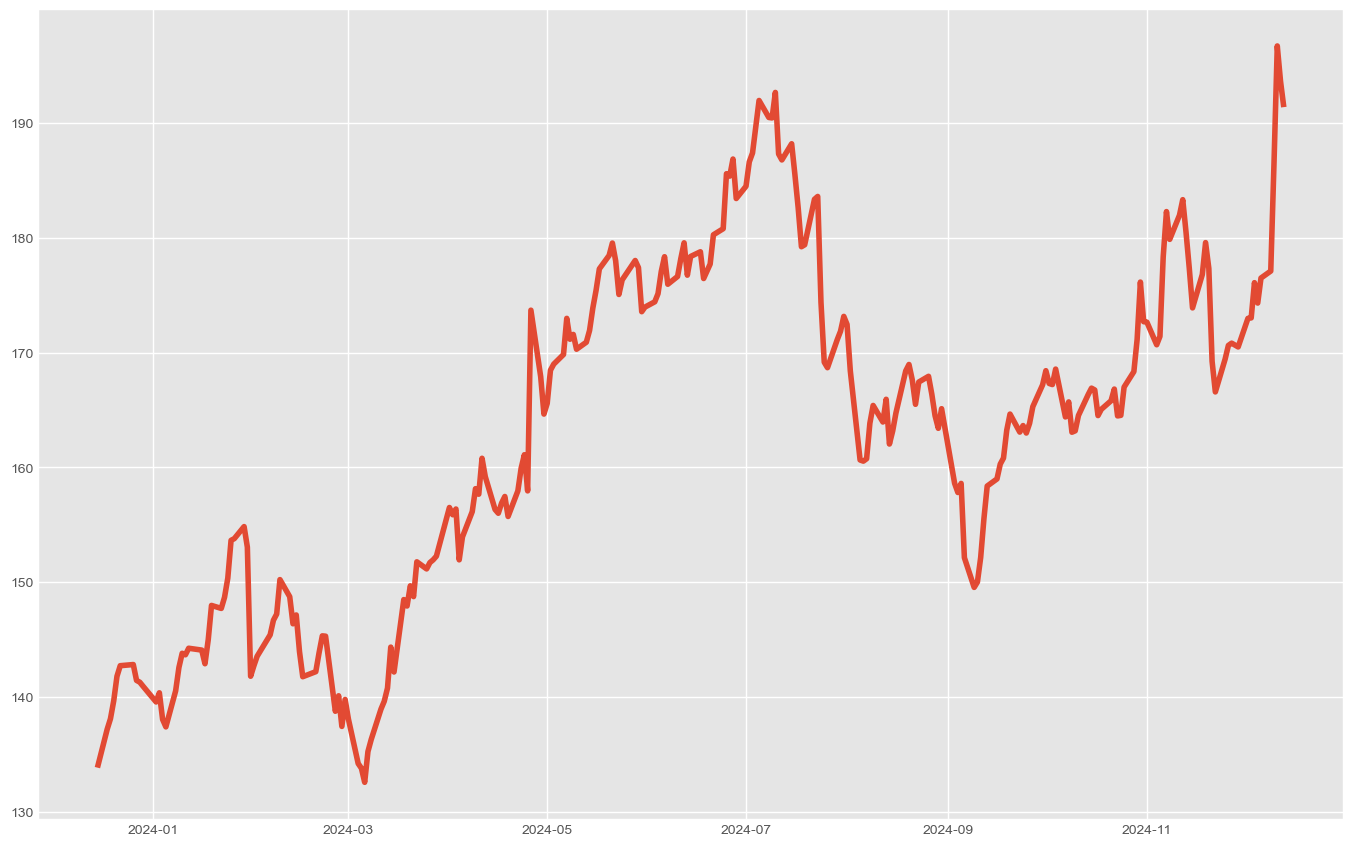

In [18]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

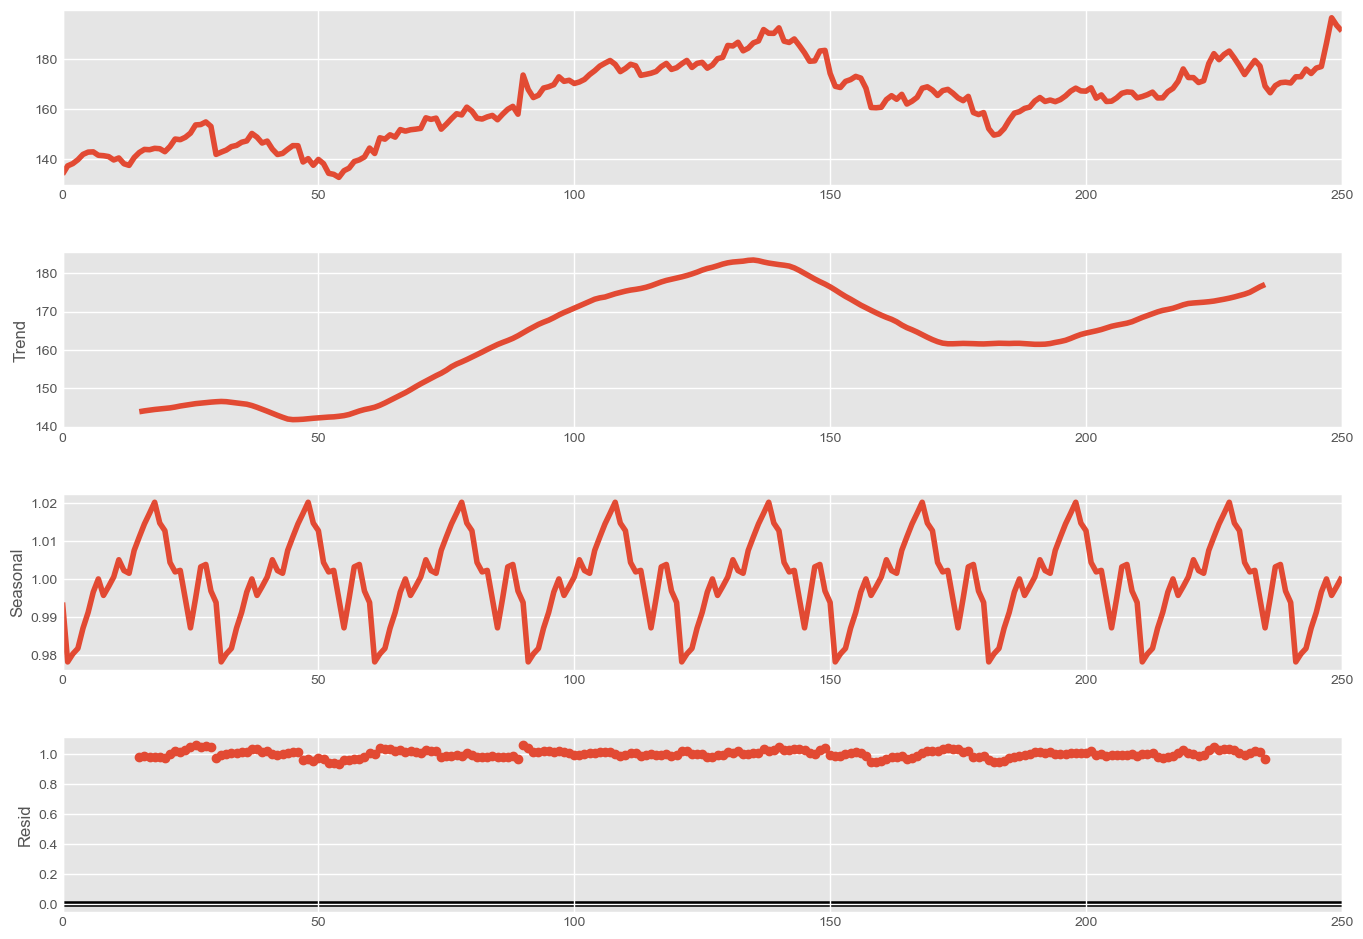

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

1. The overall price has been increasing over time.
2. There are recurring cyclical patterns in the price, likely due to daily, weekly, or monthly factors.
3. There might be additional factors influencing the price that are not captured by the trend or seasonality components.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

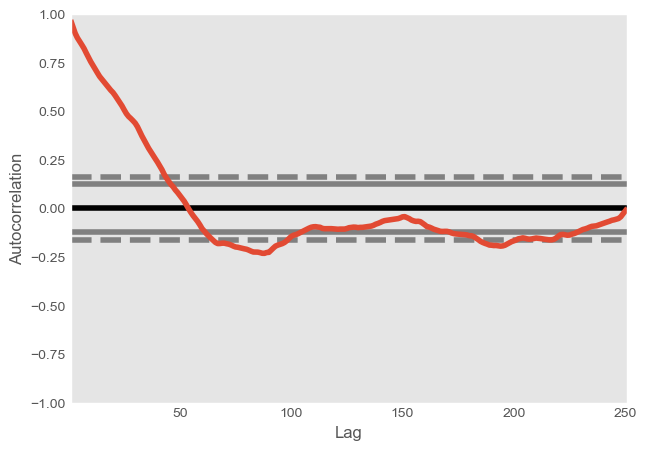

In [20]:
pd.plotting.autocorrelation_plot(data["Close"])


In [21]:
#Since the curve is moving down after the 10th line of the first boundary, therefore p = 10

C:\Users\shubh\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


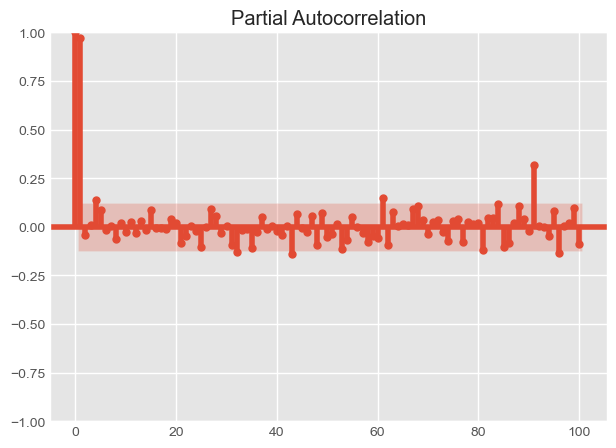

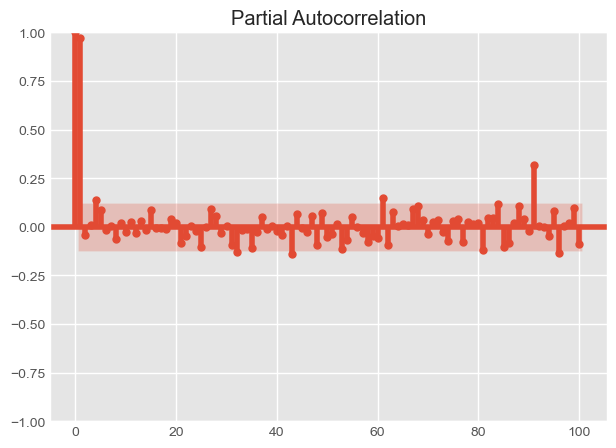

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [23]:
# 2 points are far away from others, therefore q=2 and since data is seasonal , d = 1

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
p, d, q = 10, 1, 2

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data["Close"], order=(p, d, q))
fitted = model.fit()

print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                   GOOG   No. Observations:                  251
Model:                ARIMA(10, 1, 2)   Log Likelihood                -609.936
Date:                Sat, 14 Dec 2024   AIC                           1245.872
Time:                        04:00:43   BIC                           1291.651
Sample:                             0   HQIC                          1264.296
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0595      0.339      0.176      0.860      -0.604       0.723
ar.L2          0.5552      0.393      1.413      0.158      -0.215       1.325
ar.L3         -0.0990      0.092     -1.071      0.2

In [25]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      133.840061
2      137.390243
3      137.907475
4      139.421693
          ...    
246    177.005167
247    177.344160
248    187.317731
249    196.648784
250    192.468781
Name: predicted_mean, Length: 251, dtype: float64


In [26]:
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\shubh\anaconda3\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                 GOOG   No. Observations:                  251
Model:             SARIMAX(10, 1, 2)x(10, 1, 2, 12)   Log Likelihood                -591.695
Date:                              Sat, 14 Dec 2024   AIC                           1233.390
Time:                                      04:06:16   BIC                           1320.197
Sample:                                           0   HQIC                          1268.375
                                              - 251                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4291      2.424     -0.177      0.860      -5.180       4.322
ar.L2          0.22

1. Residuals show no significant autocorrelation or heteroskedasticity however they deviate significantly from normality. 
2. Despite similar fit metrics, neither model clearly outperforms the other based on information criteria alone, as both are complex and might overfit.
3. Both models include terms with high p-values (insignificant terms) that suggest potential model simplification.

In [27]:
predictions = model.predict(len(data), len(data)+20)
print(predictions)

251    191.956664
252    194.400235
253    191.935900
254    190.973382
255    189.875420
256    192.028742
257    193.620999
258    192.406503
259    188.985731
260    188.878185
261    189.745588
262    189.441284
263    189.815998
264    188.895635
265    187.585820
266    184.590406
267    185.164717
268    186.353954
269    189.013126
270    187.760363
271    189.364336
Name: predicted_mean, dtype: float64


<Axes: >

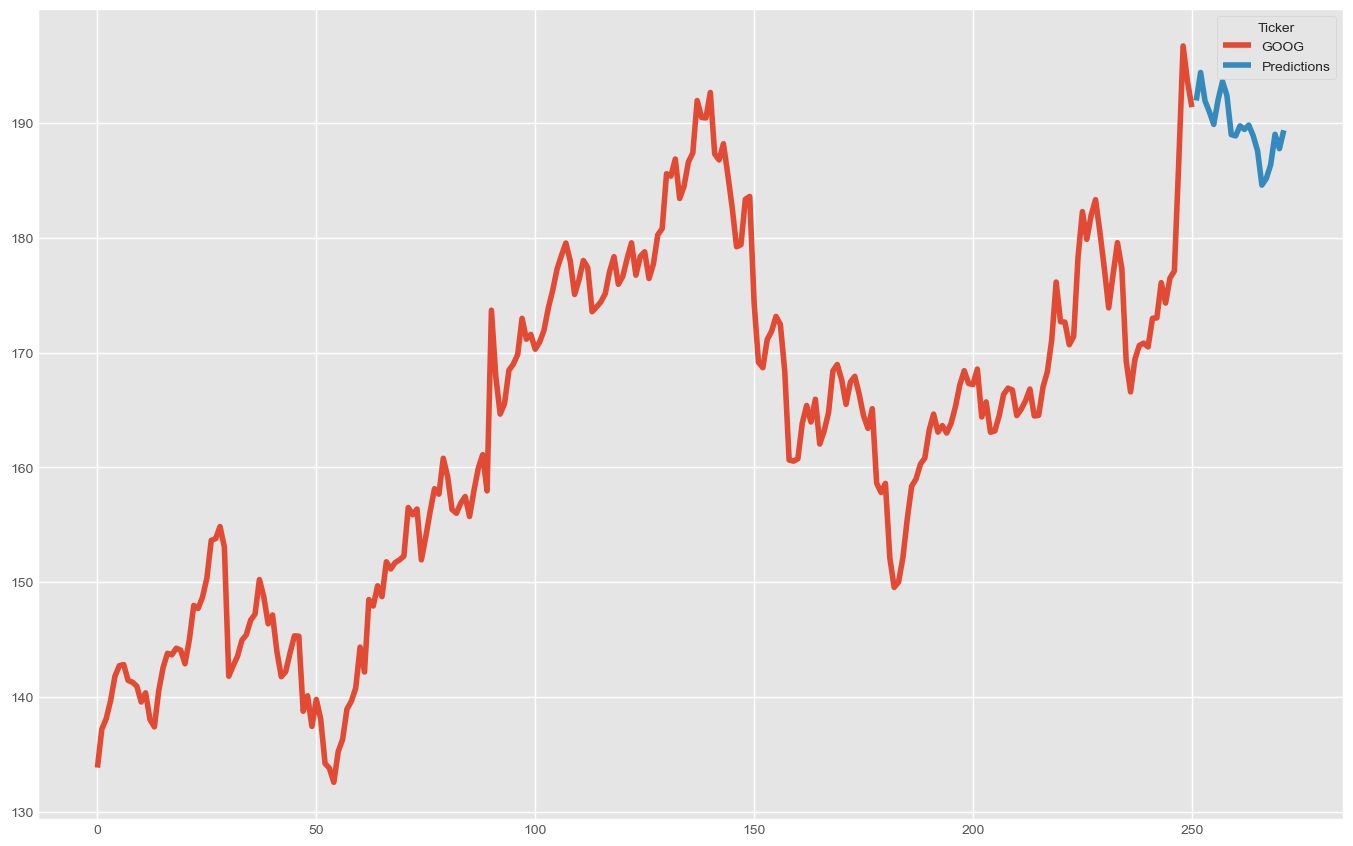

In [28]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

**PREDICTING CLOSING STOCK PRICE FOR AMZN USING LSTM**

In [29]:
df = yf.download('AMZN', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
df["Date"] = df.index
df = df[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
print(df.tail())

Price        Date        Open        High         Low       Close   Adj Close  \
Ticker                   AMZN        AMZN        AMZN        AMZN        AMZN   
246    2024-12-09  227.210007  230.080002  225.669998  226.089996  226.089996   
247    2024-12-10  226.089996  229.059998  224.199997  225.039993  225.039993   
248    2024-12-11  226.410004  231.199997  226.259995  230.259995  230.259995   
249    2024-12-12  229.830002  231.089996  227.630005  228.970001  228.970001   
250    2024-12-13  228.470001  230.199997  225.860794  227.460007  227.460007   

Price     Volume  
Ticker      AMZN  
246     46819400  
247     31199900  
248     35385800  
249     28204100  
250     28249154  


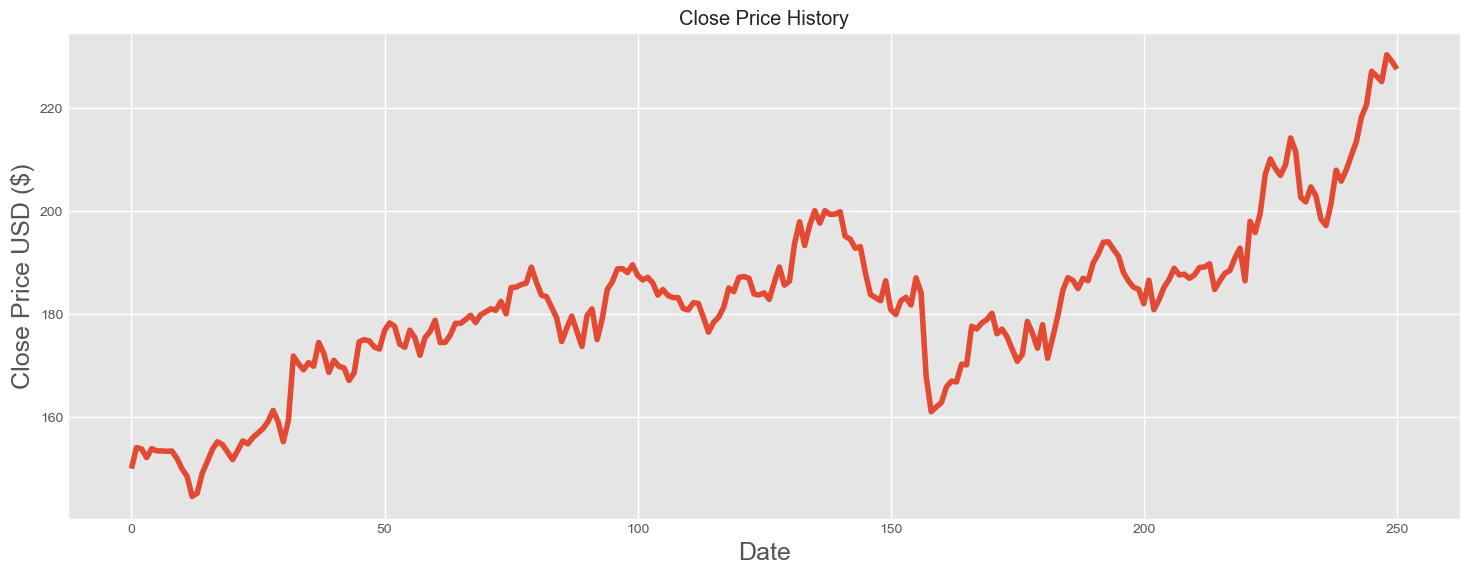

In [30]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [31]:
df = df["Close"]
print(df.head())

Ticker        AMZN
0       149.970001
1       154.070007
2       153.789993
3       152.119995
4       153.839996


In [32]:
dataset = df.values
training_data_len = int(np.ceil( len(dataset) * .95 ))



In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.06301779],
       [0.11086476],
       [0.107597  ],
       [0.08810817],
       [0.10818054],
       [0.10327917],
       [0.10316254],
       [0.10234555],
       [0.10281245],
       [0.08600766],
       [0.06255089],
       [0.04551283],
       [0.        ],
       [0.00781886],
       [0.05286497],
       [0.07935569],
       [0.10689683],
       [0.12381826],
       [0.11728311],
       [0.10024504],
       [0.08332361],
       [0.10421279],
       [0.1256855 ],
       [0.11915034],
       [0.13362118],
       [0.14354055],
       [0.15381018],
       [0.16979799],
       [0.19477173],
       [0.16839765],
       [0.12405171],
       [0.17166523],
       [0.31789   ],
       [0.30038504],
       [0.28684783],
       [0.30295245],
       [0.29490014],
       [0.34869873],
       [0.32407507],
       [0.2808962 ],
       [0.3082039 ],
       [0.29443342],
       [0.29104902],
       [0.26269107],
       [0.28031267],
       [0.35021588],
       [0.35500062],
       [0.351

In [34]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.06301779, 0.11086476, 0.107597  , 0.08810817, 0.10818054,
       0.10327917, 0.10316254, 0.10234555, 0.10281245, 0.08600766,
       0.06255089, 0.04551283, 0.        , 0.00781886, 0.05286497,
       0.07935569, 0.10689683, 0.12381826, 0.11728311, 0.10024504,
       0.08332361, 0.10421279, 0.1256855 , 0.11915034, 0.13362118,
       0.14354055, 0.15381018, 0.16979799, 0.19477173, 0.16839765,
       0.12405171, 0.17166523, 0.31789   , 0.30038504, 0.28684783,
       0.30295245, 0.29490014, 0.34869873, 0.32407507, 0.2808962 ,
       0.3082039 , 0.29443342, 0.29104902, 0.26269107, 0.28031267,
       0.35021588, 0.35500062, 0.35196631, 0.33807901, 0.33364454,
       0.37565634, 0.39269458, 0.38522581, 0.34484762, 0.33772892,
       0.37635669, 0.35920181, 0.31964061, 0.35966853, 0.37332238])]
[0.39887965676712]

[array([0.06301779, 0.11086476, 0.107597  , 0.08810817, 0.10818054,
       0.10327917, 0.10316254, 0.10234555, 0.10281245, 0.08600766,
       0.06255089, 0.04551283, 0.     

In [35]:
!pip install tensorflow

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)

C:\Users\shubh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - loss: 0.0160


In [37]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 818ms/step


15.112473693883775

In [38]:
train = df.iloc[:training_data_len]
valid = df.iloc[training_data_len:]
valid['Predictions'] = predictions
valid


C:\Users\shubh\AppData\Local\Temp\ipykernel_42160\84718757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Ticker,AMZN,Predictions
239,205.740005,199.938980
240,207.889999,200.093216
241,210.710007,200.515366
242,213.440002,201.240036
243,218.160004,202.250870
244,220.550003,203.653549
245,227.029999,205.298019
246,226.089996,207.377975
247,225.039993,209.413376
248,230.259995,211.165131


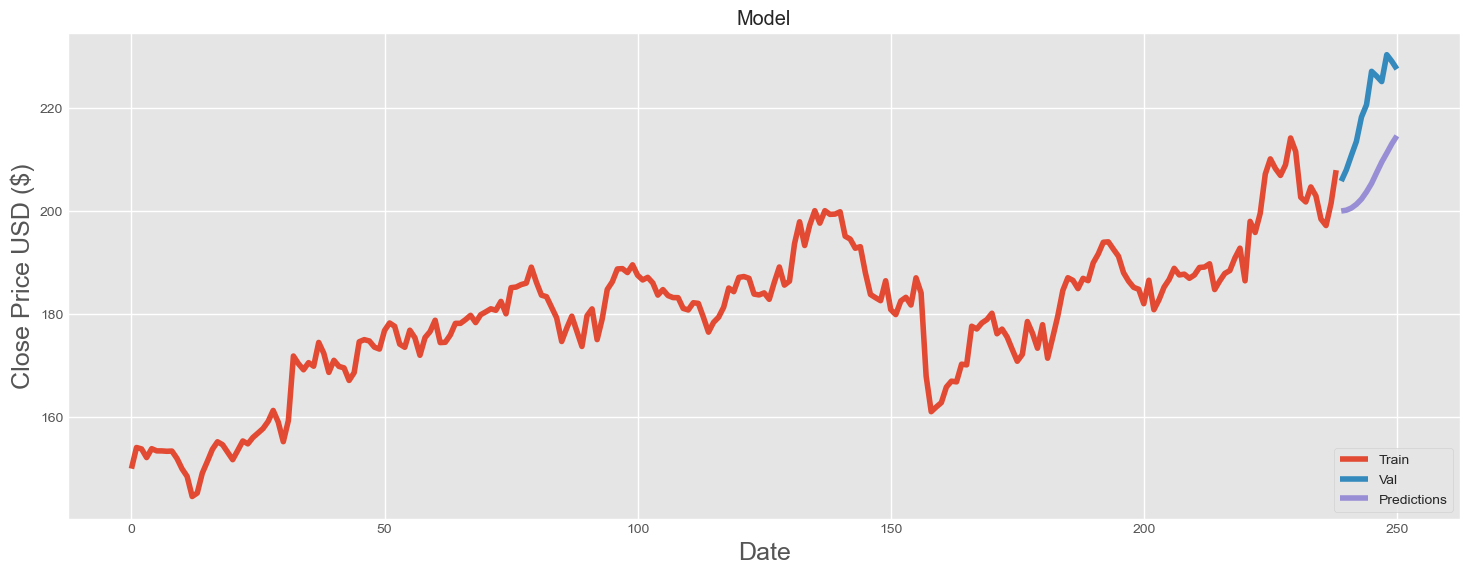

In [39]:
# Visualizing the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['AMZN'])
plt.plot(valid[['AMZN', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

**Results** : 
The model has learned the underlying patterns in the historical data and is able to capture the general direction of the time series. However, towards the end of the prediction period, the predictions deviate from the actual data. This suggests that the model's accuracy might decrease as the prediction horizon increases.

Possible Reasons for Prediction Deviation can be model complexity, data variability or bias. 
